# GraphLab Linear regression Modelling



PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16491

Number of features          : 1

543054.042563


Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

{'max_error': 4146241.71450774, 'rmse': 255198.85029916538}

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.006982     | 4352738.474055     | 2248082.608898       | 262270.125384 | 275108.549509   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

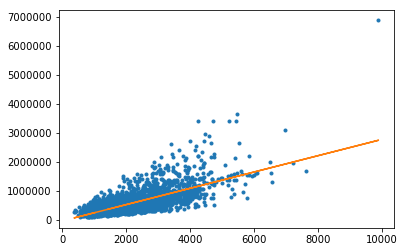

In [12]:
import graphlab
import matplotlib.pyplot as plt 
%matplotlib inline
sales=graphlab.SFrame('home_data.gl/')
graphlab.canvas.set_target("ipynb") 
sales.show(view="Scatter Plot",x="sqft_living",y="price")
train_data,test_data=sales.random_split(0.8,seed=0) 
sqft_model=graphlab.linear_regression.create(train_data,target="price",features=["sqft_living"])
print test_data["price"].mean() 
print sqft_model.evaluate(test_data)
plt.plot(test_data["sqft_living"],test_data["price"],'.',test_data["sqft_living"],sqft_model.predict(test_data),'-')


In [6]:
my_features=["sqft_living","bedrooms","bathrooms","sqft_lot","zipcode"]

In [8]:
sales[my_features].show()

In [10]:
my_features_model=graphlab.linear_regression.create(train_data,target="price",features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16518

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 110

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.044902     | 3802112.022964     | 2473886.196660       | 180988.155085 | 207000.350087   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [13]:
print my_features_model.evaluate(test_data)
print sqft_model.evaluate(test_data)

{'max_error': 3436956.9789339863, 'rmse': 179021.4656711877}
{'max_error': 4146241.71450774, 'rmse': 255198.85029916538}


In [14]:
house1 = sales[sales['id']=='5309101200']

In [15]:
print house1['price']

[620000L, ... ]


In [16]:
print sqft_model.predict(house1)
print my_features_model.predict(house1)

[628716.9563286245]
[707139.4127533821]


In [17]:
house2 = sales[sales['id']=='1925069082']
print sqft_model.predict(house2)
print my_features_model.predict(house2)

[1259757.3538355061]
[1434281.315169073]


In [19]:
sales_1 = sales[sales['zipcode'] == '98039']
print sales_1['price'].mean()

2160606.6
